# File and libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


#filepath=r'dataset/df_ecom_2_2_mv_input.csv'

filepath=r'dataset/df_ecom_2_3_outliers_input.csv'

file_tag = "Multicategory Store"

# DSLabs functions

In [3]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [4]:
%run "data_functions.py"


dslabs_functions lodaded
data_functions loaded


# Load

In [5]:
# test_data=True
test_data=False

evaluate=True

if test_data==True:

    df=pd.read_csv(filepath)

    # 10% sample
    df=df.sample(frac=0.4, replace=False)
    

else:
    df=pd.read_csv(filepath)

 
target='is_purchase'
target_metric_2='precision'
target_metric='f2'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235411 entries, 0 to 235410
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  235411 non-null  float64
 1   category_code_lvl_2  235411 non-null  float64
 2   price                235411 non-null  float64
 3   is_purchase          235411 non-null  int64  
 4   activity_in_session  235411 non-null  float64
 5   week_of_month        235411 non-null  int64  
 6   is_weekend           235411 non-null  int64  
 7   day                  235411 non-null  int64  
 8   brand_value          235411 non-null  float64
 9   product_category     235411 non-null  int64  
 10  time_of_day_sin      235411 non-null  float64
 11  time_of_day_cos      235411 non-null  float64
 12  day_of_week_sin      235411 non-null  float64
 13  day_of_week_cos      235411 non-null  float64
 14  hour_sin             235411 non-null  float64
 15  hour_cos             2

In [6]:
df.head()

,category_code_lvl_1,category_code_lvl_2,price,is_purchase,activity_in_session,week_of_month,is_weekend,day,brand_value,product_category,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0.0,3.0,949.47,0,3.0,1,0,1,779.2,2334,0.624,-0.781,-0.775,-0.632,0.966,0.259,-0.105,0.995
1312,0.0,3.0,717.39,0,2.0,1,0,1,282.5,2080,0.000,1.000,-0.775,-0.632,0.000,1.000,-0.669,-0.743
1311,0.0,3.0,172.22,0,1.0,1,0,1,282.5,2164,0.624,-0.781,-0.775,-0.632,0.259,-0.966,-0.951,-0.309
1310,0.0,3.0,272.83,0,3.0,1,0,1,282.5,2189,0.624,-0.781,-0.775,-0.632,0.707,-0.707,0.000,-1.000
1309,0.0,3.0,280.32,0,10.0,1,0,1,173.5,2447,-0.624,-0.781,-0.775,-0.632,-0.966,0.259,0.588,0.809


# Scale 1 - Standard Scaler

## Scale 1 strategy Application

In [13]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy,target)

    return df_zscore


df_1=apply_strategy_1(df)

df_1.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

In [8]:
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 235411 entries, 0 to 235410
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  235411 non-null  float64
 1   category_code_lvl_2  235411 non-null  float64
 2   price                235411 non-null  float64
 3   activity_in_session  235411 non-null  float64
 4   week_of_month        235411 non-null  float64
 5   is_weekend           235411 non-null  float64
 6   day                  235411 non-null  float64
 7   brand_value          235411 non-null  float64
 8   product_category     235411 non-null  float64
 9   time_of_day_sin      235411 non-null  float64
 10  time_of_day_cos      235411 non-null  float64
 11  day_of_week_sin      235411 non-null  float64
 12  day_of_week_cos      235411 non-null  float64
 13  hour_sin             235411 non-null  float64
 14  hour_cos             235411 non-null  float64
 15  min_sin              2

## Scale 1 train/test split 

Labels=[0, 1]


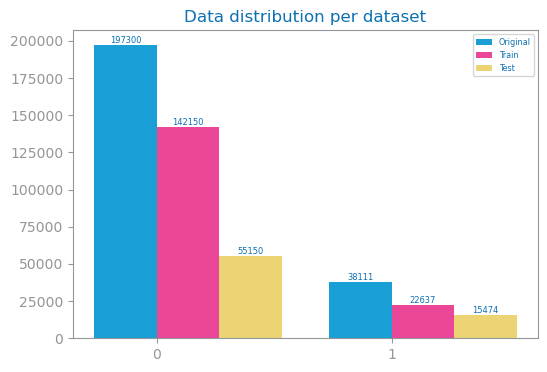

In [14]:
if evaluate ==True:
    
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)


    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

In [15]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_1['day'].min()
max_day_train = train_1['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_1['day'].min()
max_day_test = test_1['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")

Train set - Min day: -2.559877731066141, Max day: 0.1679878522530421
Test set - Min day: 0.1679878522530421, Max day: 2.093540028713642


## Scale 1 evaluate

### optimize for target_metric_2 - precision

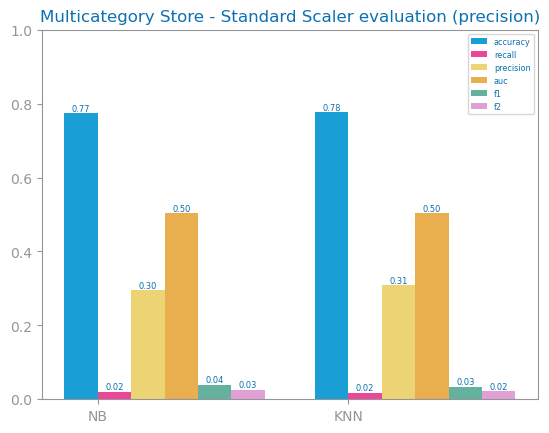

In [16]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=target_metric_2)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag} - Standard Scaler evaluation ({target_metric_2})", percentage=True
    )
    savefig(f"images/{file_tag}_prep_scaling_approach_1_eval_{target_metric_2}.png")
    show()

### optimize for target metric - f2

In [17]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_zscore=apply_standard_scaler(df_copy,target)

    return df_zscore


df_1=apply_strategy_1(df)

df_1.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

Labels=[0, 1]


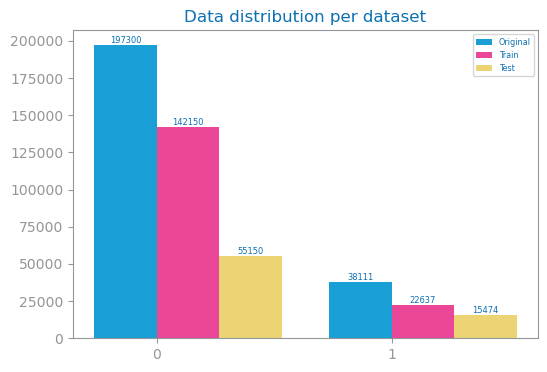

In [18]:
if evaluate ==True:
    
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)

    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)


    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

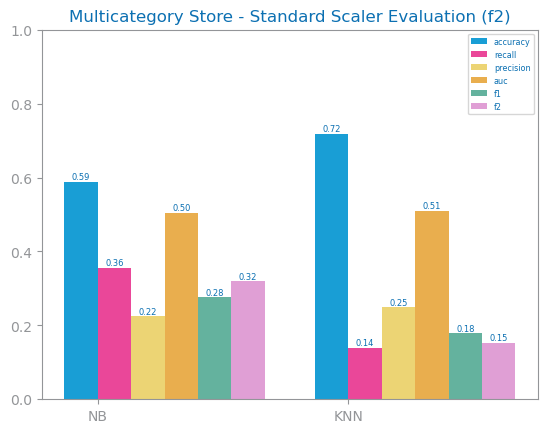

In [25]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=eval_metric_2)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag} - Standard Scaler Evaluation ({eval_metric_2})", percentage=True
    )
    savefig(f"images/{file_tag}_prep_scaling_approach_1_evaluation_eval_metric_2.png")
    show()

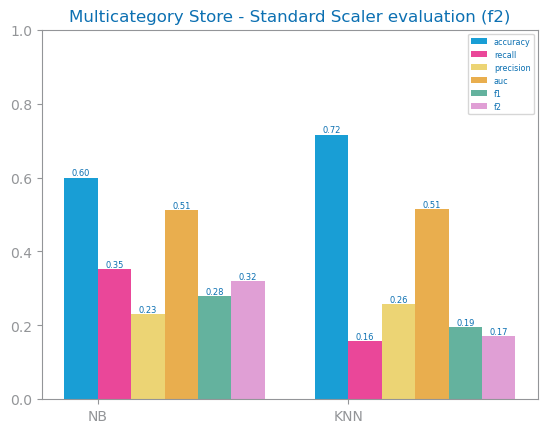

In [19]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values
if evaluate == True:
    
    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_purchase', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag} - Standard Scaler evaluation ({target_metric})", percentage=True
    )
    savefig(f"images/{file_tag}_prep_scaling_approach_1_eval_{target_metric}.png")
    show()

# Scale 2 - MinMax Scaler


## Scale 2 strategy aplication

In [20]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df,target)

    return df_copy

df_2=apply_strategy_2(df)
df_2.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

## Scale 2 train/test split 

Labels=[0, 1]


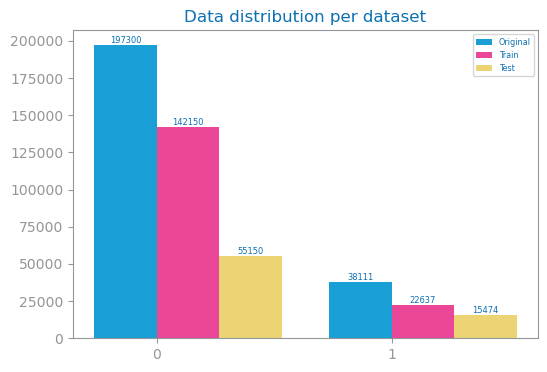

In [21]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Scale 2 evaluate

### optimize for target_metric_2 - precision

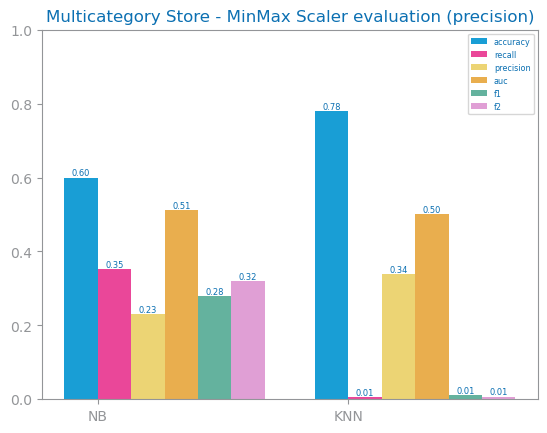

In [22]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric=target_metric_2)
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag} - MinMax Scaler evaluation ({target_metric_2})", percentage=True
    )
    savefig(f"images/{file_tag}_prep_scaling_approach_2_eval_{target_metric_2}.png")
    show()

### optimize for target_metric - f2

In [23]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler



def apply_strategy_2(df):

    df_copy=df.copy()
    
    # this script is available in data_functions originally from DSLabs site in Scaling chapter
    df_copy=apply_min_max_scaler(df,target)

    return df_copy

df_2=apply_strategy_2(df)
df_2.columns

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')

Labels=[0, 1]


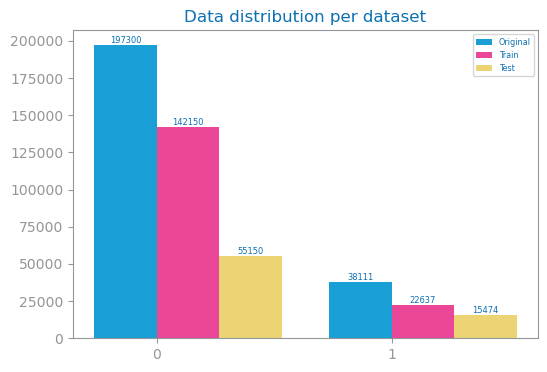

In [24]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the functions to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

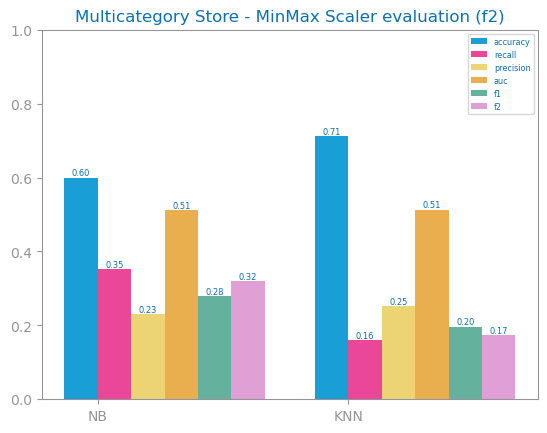

In [25]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_purchase', metric=target_metric)
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag} - MinMax Scaler evaluation ({target_metric})", percentage=True
    )
    savefig(f"images/{file_tag}_prep_scaling_approach_2_eval_{target_metric}.png")
    show()

# scaling plot

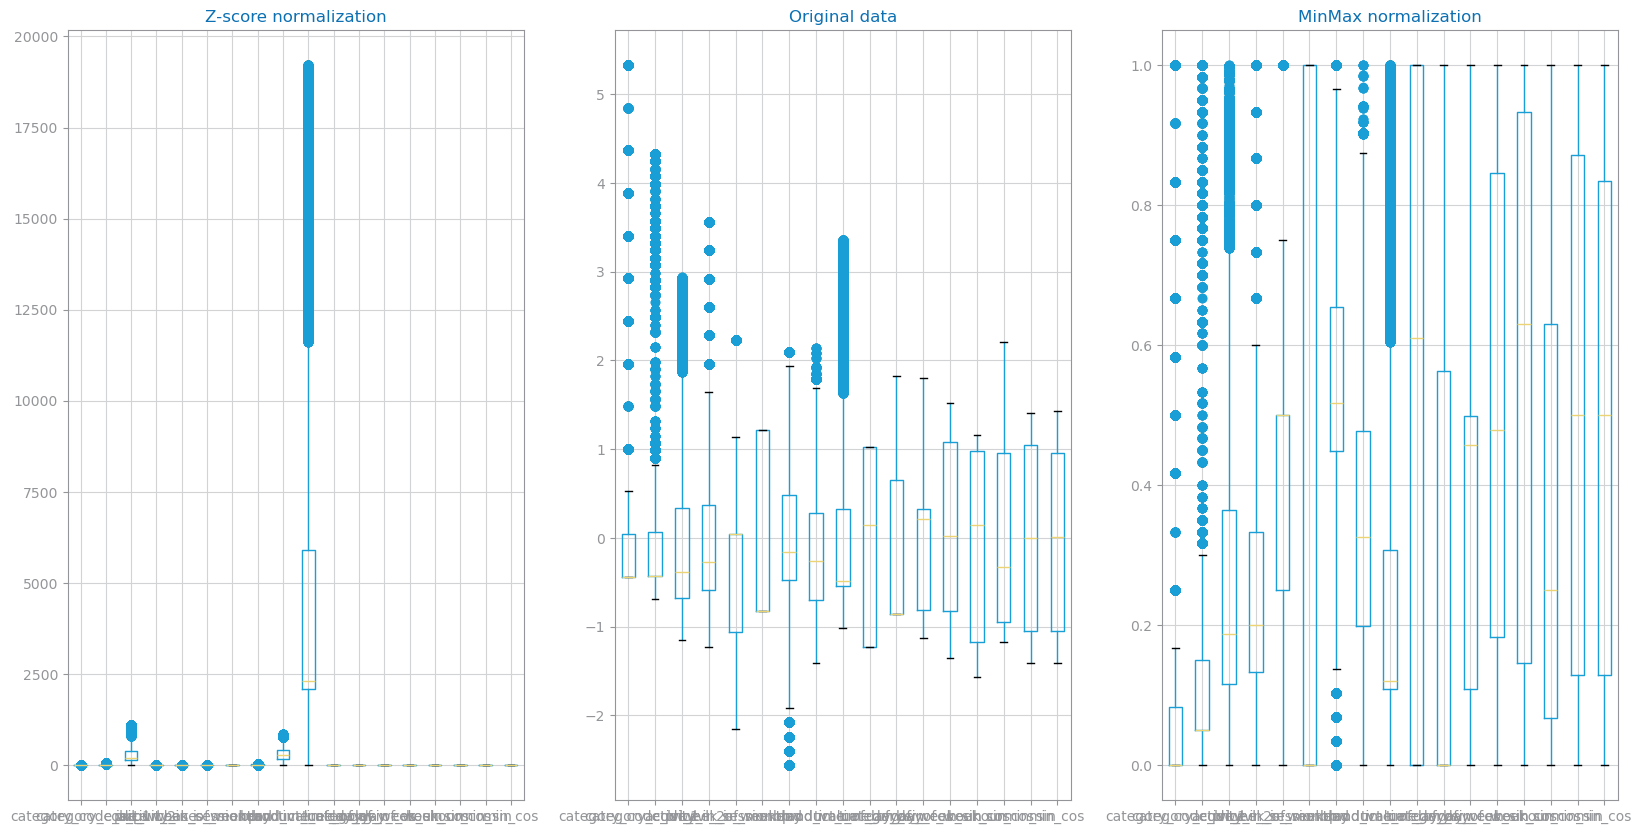

In [26]:
if evaluate == True:

    from matplotlib.pyplot import subplots, show

    fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)
    axs[0, 1].set_title("Original data")
    df.boxplot(ax=axs[0, 0])

    axs[0, 0].set_title("Z-score normalization")
    df_1.boxplot(ax=axs[0, 1])

    axs[0, 2].set_title("MinMax normalization")
    df_2.boxplot(ax=axs[0, 2])
    show()

# Approach uplift comparison

## uplift df

In [27]:
if evaluate ==True:

    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

Approach 1                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.599867  0.352591  0.230240  0.510919  0.278573  0.318718   
KNN           0.716258  0.156650  0.257516  0.514961  0.194800  0.169965   

            Approach 2                                                    \
              accuracy    recall precision       auc        f1        f2   
Naive Bayes   0.599867  0.352591  0.230240  0.510919  0.278573  0.318718   
KNN           0.711288  0.160786  0.251516  0.513267  0.196168  0.173288   

              Uplift                                                    
            accuracy    recall precision       auc        f1        f2  
Naive Bayes  0.00000  0.000000     0.000  0.000000  0.000000  0.000000  
KNN         -0.00497  0.004136    -0.006 -0.001694  0.001368  0.003323

# Analysis

Comparing Scalling approaches:
- In Scalling treatment, let's go with approach 2 as has a bit higher combination of f2 and precision

Comparing with previous dataset (missing values):
- For now lets go with Missing values dataset, because the score of the main kpis recall, precision and f2 are way better in Missing Values

Decision:
- In balancing, proceed with DF - Missing Values


# save to csv

In [28]:
if test_data==False:
    

    data_save=df.copy()

    # apply winning strategy
    data_save=apply_strategy_2(data_save)
        
    data_save.to_csv(f"dataset/df_ecom_2_4_scaler_input.csv", index=False)
    

    print(data_save.columns)

Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')


## train test csv

In [29]:
if test_data==False:
    
    data_save_copy=data_save.copy()

    y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)

    train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  
    
    train.to_csv(f"dataset/df_ecom_2_4_scaler_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"dataset/df_ecom_2_4_scaler_input_test.csv", index=False)
    print(test.columns)

Labels=[0, 1]
Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')
Index(['category_code_lvl_1', 'category_code_lvl_2', 'price',
       'activity_in_session', 'week_of_month', 'is_weekend', 'day',
       'brand_value', 'product_category', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'is_purchase'],
      dtype='object')
